In [8]:
from torch.optim import Adam
from gpytorch.optim import NGD
from experiments.partial import build_partial, plot_partial, pretrain_partial
from pathlib import Path
import numpy as np

from lafomo.datasets import DrosophilaSpatialTranscriptomics, HomogeneousReactionDiffusion
from lafomo.trainers import PartialPreEstimator
from lafomo.plot import plot_spatiotemporal_data
from lafomo.plot.misc import plot_variational_dist
from lafomo.utilities.torch import spline_interpolate_gradient, softplus

from matplotlib import pyplot as plt
import torch
from lafomo.configuration import VariationalConfiguration

In [2]:
drosophila = True
kni_params = dict(sensitivity=0.183,
                  decay=0.0770,
                  diffusion=0.0125)
gt_params = dict(sensitivity=0.1107,
                  decay=0.1110,
                  diffusion=0.0159)
kr_params = dict(sensitivity=0.0970,
                 decay=0.0764,
                 diffusion=0.0015)
params = dict(kr=kr_params, kni=kni_params, gt=gt_params)
if drosophila:
    gene = 'kr'
    dataset = DrosophilaSpatialTranscriptomics(
        gene=gene, data_dir='../../../data', scale=True)
    params = dict(lengthscale=10,
                  **params[gene],
                  parameter_grad=False,
                  warm_epochs=-1,
                  natural=True,
                  zero_mean=True,
                  clamp=True)
    disc = dataset.disc
else:
    data = 'toy-spatial'
    dataset = HomogeneousReactionDiffusion(data_dir='../../../data')
    params = dict(lengthscale=0.2,
                  sensitivity=1,
                  decay=0.1,
                  diffusion=0.01,
                  warm_epochs=-1,
                  dp=0.025,
                  natural=False,
                  clamp=False)
    disc = 1
model_name = '0savedmodel'
# model_name = 'epoch165'
# model_name = 'model_with_3'
lfm, trainer, plotter = build_partial(
    dataset,
    params)#,
    # reload=f'../../../experiments/{data}/partial/{model_name}')

tx torch.Size([2, 512])
x dp is set to tensor(1., dtype=torch.float64)


'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


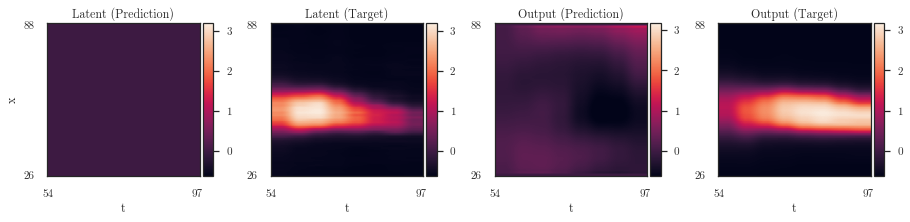

In [3]:
plot_partial(dataset, lfm, trainer, plotter, Path('./'), params)

In [9]:
pretrain_partial(dataset, lfm, trainer, params)

num training 153
Epoch 001/080 - Loss: 0.32 (0.24 0.08) kernel: [[[10.66217858  9.70995138]]]
Epoch 011/080 - Loss: 0.21 (0.18 0.03) kernel: [[[11.16713406 10.14721177]]]
Epoch 021/080 - Loss: 0.13 (0.12 0.01) kernel: [[[11.68493344 10.2904124 ]]]
Epoch 031/080 - Loss: 0.05 (0.05 0.00) kernel: [[[12.22667985 10.473167  ]]]
Epoch 041/080 - Loss: -0.01 (-0.02 0.00) kernel: [[[12.7719602  10.73079897]]]
Epoch 051/080 - Loss: -0.08 (-0.08 0.00) kernel: [[[13.39903109 11.02696542]]]
Epoch 061/080 - Loss: -0.14 (-0.14 0.01) kernel: [[[14.17348866 11.04244586]]]
Epoch 071/080 - Loss: -0.19 (-0.20 0.01) kernel: [[[15.01020225 10.76876257]]]


([(1621180179.7693639, 0.32439624502039205),
  (1621180180.148027, 0.30982887606189413),
  (1621180180.786363, 0.29626458865750943),
  (1621180181.059254, 0.28353096517551607),
  (1621180181.4621499, 0.2716526590506425),
  (1621180181.7305548, 0.2600863106361189),
  (1621180181.991436, 0.2492699082534786),
  (1621180182.224983, 0.23868990476531066),
  (1621180182.4819908, 0.22873009330478133),
  (1621180182.734695, 0.2190509726353571),
  (1621180183.006304, 0.20954971732116945),
  (1621180183.3081422, 0.2003912654485776),
  (1621180183.5732841, 0.19146940606440588),
  (1621180183.8686259, 0.18262212013602191),
  (1621180184.122275, 0.1742016985159349),
  (1621180184.3643498, 0.16542361801574962),
  (1621180184.609657, 0.15756475621341684),
  (1621180185.014068, 0.14962060000476896),
  (1621180185.499805, 0.14166652448628841),
  (1621180185.75342, 0.13377398490835923),
  (1621180186.167524, 0.12574101556997905),
  (1621180186.6186152, 0.11826685347632575),
  (1621180186.884906, 0.111067

/Users/jacob/Documents/proj/torchcubicspline/torchcubicspline/interpolate.py:277: UserWarning: input value tensor is non-contiguous, this will lower the performance due to extra data copy when converting non-contiguous tensor to contiguous, please use contiguous input value tensor if possible (Triggered internally at  ../aten/src/ATen/native/BucketizationUtils.h:25.)
  index = torch.bucketize(t.detach(), self._t) - 1


torch.Size([1, 512])


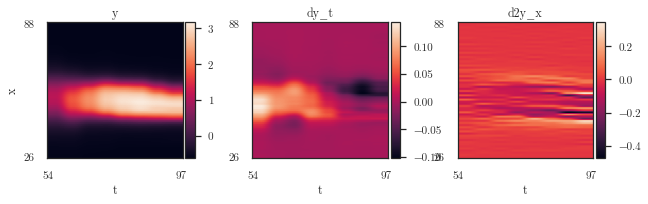

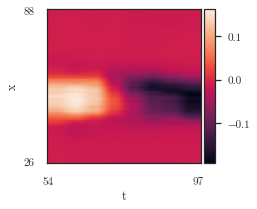

In [4]:
from lafomo.utilities.torch import inv_softplus
sensitivity = (torch.tensor(params['sensitivity']))
decay = (torch.tensor(params['decay']))
diffusion = (torch.tensor(params['diffusion']))
orig_data = dataset.orig_data.squeeze().t()
num_t_orig = orig_data[:, 0].unique().shape[0]
num_x_orig = orig_data[:, 1].unique().shape[0]

tx = trainer.tx
num_t = tx[0, :].unique().shape[0]
num_x = tx[1, :].unique().shape[0]
y_target = trainer.y_target[0]


In [10]:
lfm.config.num_samples = 20
trainer.plot_outputs = True
lfm.pretrain(False)
trainer.train(10, report_interval=1);

Mean output variance: 0.2571568299181508
Test loss: 12.022128166167136
prot Q2: 0.655
prot CA: 0.543
mrna Q2: 0.621
mrna CA: 0.742
Epoch 021/030 - Loss: 4.77 (4.75 0.02) kernel: [[[15.86720659 10.67174418]]] s: 0.0970000239062052 dec: 0.07639997519055218 diff: 0.0014999576719171928
Mean output variance: 10.329863257521854
Test loss: 1031026442.601402
prot Q2: -25617922.343
prot CA: 0.000
mrna Q2: -96146423.562
mrna CA: 0.000
Epoch 022/030 - Loss: 603434421.94 (202073768.48 401360653.45) kernel: [[[15.89308441 10.69762141]]] s: 0.0970000239062052 dec: 0.07639997519055218 diff: 0.0014999576719171928
Mean output variance: 1.0000000000000005e-07
Test loss: inf
prot Q2: -inf
prot CA: 0.000
mrna Q2: -inf
mrna CA: 0.000
Epoch 023/030 - Loss: inf (inf inf) kernel: [[[nan nan]]] s: 0.0970000239062052 dec: 0.07639997519055218 diff: 0.0014999576719171928


/Users/jacob/miniconda3/envs/wishart/lib/python3.7/site-packages/gpytorch/lazy/lazy_tensor.py:1364: NumericalWarning: Runtime Error when computing Cholesky decomposition: Matrix not positive definite after repeatedly adding jitter up to 1.0e-06. Original error on first attempt: cholesky_cpu: For batch 0: U(3,3) is zero, singular U.. Using RootDecomposition.
  NumericalWarning,


NanError: cholesky_cpu: 181476 of 181476 elements of the torch.Size([1, 426, 426]) tensor are NaN.

In [9]:
# for key in trainer.parameter_trace.keys():
#     params = torch.stack(trainer.parameter_trace[key])
#     for i in range(1, params.ndim):
#         params = params.mean(-1)
    # plt.figure()
    # plt.plot(params)
[softplus(param) for param in lfm.fenics_parameters]

[tensor([[0.1002]], dtype=torch.float64),
 tensor([[0.0770]], dtype=torch.float64),
 tensor([[0.0125]], dtype=torch.float64)]

In [10]:
from lafomo.plot import tight_kwargs
plot_partial(dataset, lfm, trainer, plotter, Path('./'), params)

# plt.savefig(Path('./') / f'kinetics-{gene}.pdf', **tight_kwargs)

IndexError: The shape of the mask [456] at index 0 does not match the shape of the indexed tensor [2850, 1] at index 0

In [11]:
from lafomo.utilities.torch import q2, cia
f = lfm(tx)
f_mean = f.mean.detach()
f_var = f.variance.detach()
y_target = trainer.y_target[0]
def cia(y_test, f_mean, f_var):
    return ((y_test >= (f_mean - 1 * f_var.sqrt())) &
            (y_test <= (f_mean + 1 * f_var.sqrt()))).double().mean()

print(f_mean.shape, y_target.shape, f_var.shape)
print('Q2', q2(y_target.squeeze(), f_mean.squeeze()))
print('CA', cia(y_target.squeeze(), f_mean.squeeze(), f_var.squeeze()))

torch.Size([2850, 1]) torch.Size([456]) torch.Size([2850, 1])


RuntimeError: The size of tensor a (456) must match the size of tensor b (2850) at non-singleton dimension 0

In [ ]:
gp = lfm.gp_model(tx.t())
lf_target = orig_data[trainer.t_sorted, 2]
f_mean = gp.mean.detach().view(num_t, num_x)[::disc].reshape(-1)
f_var = gp.variance.detach().view(num_t, num_x)[::disc].reshape(-1)

print('Q2', q2(lf_target.squeeze(), f_mean.squeeze()))
print('CA', cia(lf_target.squeeze(), f_mean.squeeze(), f_var.squeeze()))


In [ ]:
lfm.save('./kr-1205')

In [ ]:
lfm2, trainer2, plotter2 = build_partial(
    dataset,
    params,
    reload='./kr-1205')

In [ ]:
gp = lfm2.gp_model(tx.t())
lf_target = orig_data[trainer.t_sorted, 2]
f_mean = gp.mean.detach()
f_var = gp.variance.detach()

print('Q2', q2(lf_target.squeeze(), f_mean.squeeze()))
print('CA', cia(lf_target.squeeze(), f_mean.squeeze(), f_var.squeeze()))
